In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/boston_housing/kc_house_data.csv'
p_df_raw = pd.read_csv(abo_path)

In [3]:
p_df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
p_df_raw.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
p_df_raw = p_df_raw.sort_values(['date'])

In [6]:
p_df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16768,5561000190,20140502T000000,437500.0,3,2.25,1970,35100,2.0,0,0,...,9,1970,0,1977,0,98027,47.4635,-121.991,2340,35100
9596,472000620,20140502T000000,790000.0,3,2.50,2600,4750,1.0,0,0,...,9,1700,900,1951,0,98117,47.6833,-122.400,2380,4750
9587,1024069009,20140502T000000,675000.0,5,2.50,2820,67518,2.0,0,0,...,8,2820,0,1979,0,98029,47.5794,-122.025,2820,48351
20602,7853361370,20140502T000000,555000.0,4,2.50,3310,6500,2.0,0,0,...,8,3310,0,2012,0,98065,47.5150,-121.870,2380,5000
11577,5056500260,20140502T000000,440000.0,4,2.25,2160,8119,1.0,0,0,...,8,1080,1080,1966,0,98006,47.5443,-122.177,1850,9000


In [7]:
p_df_raw.zipcode.nunique()

70

In [8]:
temp = p_df_raw.groupby(['zipcode'])['id'].count()

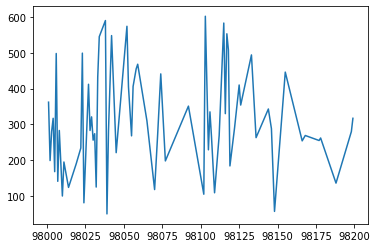

In [9]:
plt.plot(temp.index, temp.values)

In [74]:
df_housing = p_df_raw[['price','bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']]

In [75]:
md = smf.mixedlm("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors ", df_housing, groups=df_housing["zipcode"])

In [76]:
mdf = md.fit()
print(mdf.summary())

                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    price           
No. Observations:      21613      Method:                REML            
No. Groups:            70         Scale:                 35219308897.5110
Min. group size:       50         Log-Likelihood:        -293272.4456    
Max. group size:       602        Converged:             Yes             
Mean group size:       308.8                                             
-------------------------------------------------------------------------
                 Coef.       Std.Err.    z    P>|z|   [0.025     0.975]  
-------------------------------------------------------------------------
Intercept        131466.761 27797.981   4.729 0.000  76983.718 185949.803
bedrooms         -45776.257  1741.126 -26.291 0.000 -49188.800 -42363.713
bathrooms         16265.504  2810.432   5.788 0.000  10757.159  21773.849
sqft_living         271.151     2.401 112.945 0.000    2

In [77]:
MLM_predic = mdf.predict(df_housing)

In [78]:
MLM_predic

16768    540587.094682
9596     724478.816959
9587     691575.871242
20602    855164.481548
11577    556160.852237
             ...      
7898     312968.786412
928      423428.532628
5637     419249.864381
13053    430437.021694
16594    970034.471658
Length: 21613, dtype: float64

In [79]:
mean_squared_error(MLM_predic, df_housing['price'])

67863290806.97806

In [81]:
X = p_df_raw[['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']]
y = p_df_raw['price']

In [83]:
clf = LinearRegression().fit(X,y)
ols_predict = clf.predict(X)

In [84]:
mean_squared_error(ols_predict, y)

65350446544.38803

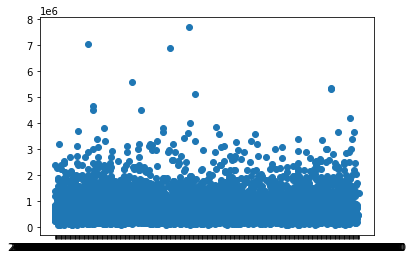

In [15]:
plt.scatter(p_df_raw.date, p_df_raw.price)

In [10]:
data = sm.datasets.get_rdataset("dietox", "geepack").data

In [11]:
data.head()

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5


In [46]:
df_X = data[['Weight','Time','Pig']]

In [47]:
md = smf.mixedlm("Weight ~ Time", df_X, groups=data["Pig"])

In [48]:
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [49]:
df_X

,Weight,Time,Pig
0,26.50000,1,4601
1,27.59999,2,4601
2,36.50000,3,4601
3,40.29999,4,4601
4,49.09998,5,4601
...,...,...,...
856,73.19995,8,8442
857,81.69995,9,8442
858,90.29999,10,8442
859,96.00000,11,8442


In [50]:
predic = mdf.predict(df_X)

In [52]:
mean_squared_error(predic, df_X['Weight'])

51.26223595860064

### OLS

In [58]:
from sklearn.linear_model import LinearRegression
X = data[['Time','Pig']]
y = data['Weight']

In [62]:
clf = LinearRegression().fit(X,y)
ols_predict = clf.predict(X)

In [63]:
mean_squared_error(ols_predict, y)

51.25143564415134